In [1]:
import pandas as pd
df=pd.read_csv("pluviometrie.csv")
df = df.round(2)
df

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente
0,2023-11-14,Jendouba,0.0,0.0,45.51,0.2,100.21,23.8,77.8
1,2023-11-14,Bouselem,0.0,0.4,45.79,0.8,96.30,30.4,72.7
2,2023-11-14,Ghar Dima,0.0,0.0,46.61,2.5,92.35,15.0,54.5
3,2023-11-14,Ain Drahem,0.0,20.0,202.26,30.0,304.93,69.0,109.0
4,2023-11-14,Tabarka,0.0,31.0,144.52,61.2,218.43,24.4,100.2
...,...,...,...,...,...,...,...,...,...
93831,2021-09-01,Zarzis,0.0,0.0,19.79,0.0,0.48,0.0,0.0
93832,2021-09-01,Djerba Houmet Souk,0.0,0.0,18.56,0.0,1.08,0.0,0.0
93833,2021-09-01,Tataouine,0.0,0.0,9.71,0.0,0.38,0.0,0.0
93834,2021-09-01,Ghomrassen,0.0,0.0,7.82,0.0,0.00,0.0,0.0


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                        datetime64[ns]
station                             object
Pluvio_du_jour                     float64
Cumul_du_mois                      float64
Cumul_moy_du_mois                  float64
Cumul_periode                      float64
Cumul_moy_periode                  float64
Cumul_mois_precedent               float64
Cumul_periode_precedente           float64
dtype: object

In [3]:
# Remove extra spaces and ensure consistent capitalization in 'station' column
df['station'] = df['station'].str.strip().str.title()
print(df['station'].unique())

['Jendouba' 'Bouselem' 'Ghar Dima' 'Ain Drahem' 'Tabarka'
 'Barrage De Bou Heurtma' 'Beja' 'Medjez El-Bab' 'Nefza'
 'Barrage De Sidi Sallem' 'Teboursouk' 'Thibar' 'Kef'
 'Barrage De Mellegue' 'Sakiet Sidi Youssef' 'Kalaat Senan' 'El Ksour'
 'Sers' 'Tajerouine' 'Seliana' 'Bouarada' 'El Krib' 'Rouhia'
 'Boussadia Bargou' 'Barrage Lakhmess' 'Makthar' 'Tunis Carthage'
 'Tunis Manoubiya' 'Ariana' 'Sidi Thabet' 'Kalaat Andalous' 'Manouba'
 'Borj Al Amri' 'El Batan' 'Ben Arous' 'Borj Sedria' 'Khelidia' 'Nabeul'
 'Kelibia' 'Korba' 'Menzel Bou Zelfa' 'Grombeliya' 'Hewariya' 'Hammamet'
 'Zaghouan' 'El Fahs' 'Barrage De Bir Mcherga' 'Saouaf' 'Nadhour'
 'Bizerte Sidi Ahmed' 'Tinja' 'Ras Jbel' 'El Aalia' 'Mateur' 'Joumine'
 'Sejnane' 'Kairouan' 'Hafouz' 'Barrage De Nebhana' 'Oueslatiya' 'Sbikha'
 'Sidi Amor Bou Hadjila' 'Barrage Sidi Saad' 'Kasserine' 'Feriana'
 'Foussena' 'Khanka Zeziya' 'Sebiba' 'Sbitla' 'Tela' 'Sidi Bouzid'
 'Sidi Ali Ben Aoun' 'Bir El Hafey' 'Meknassy' 'Regueb' 'Jilma' 'Mezzoun

In [4]:
station_to_gouvernerat = {
    'Jendouba': 'Jendouba',
    'Bouselem': 'Jendouba',
    'Ghar Dima': 'Jendouba',
    'Ain Drahem': 'Jendouba',
    'Tabarka': 'Jendouba',
    'Beja': 'Beja',
    'Medjez El-Bab': 'Beja',
    'Nefza': 'Beja',
    'Teboursouk': 'Beja',
    'Thibar': 'Beja',
    'Kef': 'Kef',
    'Sakiet Sidi Youssef': 'Kef',
    'Kalaat Senan': 'Kef',
    'El Ksour': 'Kef',
    'Sers': 'Kef',
    'Tajerouine': 'Kef',
    'Seliana': 'Seliana',
    'Bouarada': 'Seliana',
    'El Krib': 'Seliana',
    'Rouhia': 'Seliana',
    'Boussadia Bargou': 'Seliana',
    'Makthar': 'Siliana',  
    'Tunis Carthage': 'Tunis',
    'Tunis Manoubiya': 'Tunis',
    'Ariana': 'Ariana',
    'Sidi Thabet': 'Ariana',
    'Kalaat Andalous': 'Ariana',
    'Manouba': 'Manouba',
    'Borj Al Amri': 'Manouba',
    'El Batan': 'Manouba',
    'Ben Arous': 'Ben Arous',
    'Borj Sedria': 'Ben Arous',
    'Khelidia': 'Ben Arous',
    'Nabeul': 'Nabeul',
    'Kelibia': 'Nabeul',
    'Korba': 'Nabeul',
    'Menzel Bou Zelfa': 'Nabeul',
    'Grombeliya': 'Nabeul',
    'Hewariya': 'Nabeul',
    'Hammamet': 'Nabeul',
    'Zaghouan': 'Zaghouan',
    'El Fahs': 'Zaghouan',
    'Saouaf': 'Zaghouan',
    'Nadhour': 'Zaghouan',
    'Bizerte Sidi Ahmed': 'Bizerte',
    'Tinja': 'Bizerte',
    'Ras Jbel': 'Bizerte',
    'El Aalia': 'Bizerte',
    'Mateur': 'Bizerte',
    'Joumine': 'Bizerte',
    'Sejnane': 'Bizerte',
    'Kairouan': 'Kairouan',
    'Hafouz': 'Kairouan',
    'Barrage De Nebhana': 'Kairouan',  
    'Oueslatiya': 'Kairouan',
    'Sbikha': 'Kairouan',
    'Sidi Amor Bou Hadjila': 'Kairouan',
    'Barrage Sidi Saad': 'Kairouan', 
    'Kasserine': 'Kasserine',
    'Feriana': 'Kasserine',
    'Foussena': 'Kasserine',
    'Khanka Zeziya': 'Kasserine',
    'Sebiba': 'Kasserine',
    'Sbitla': 'Kasserine',
    'Tela': 'Kasserine',
    'Sidi Bouzid': 'Sidi Bouzid',
    'Sidi Ali Ben Aoun': 'Sidi Bouzid',
    'Bir El Hafey': 'Sidi Bouzid',
    'Meknassy': 'Sidi Bouzid',
    'Regueb': 'Sidi Bouzid',
    'Jilma': 'Sidi Bouzid',
    'Mezzouna': 'Sidi Bouzid',
    'Sousse': 'Sousse',
    'Enfidha': 'Sousse',
    "M'Saken": 'Sousse',
    'Sidi Bou Ali': 'Sousse',
    'Kondar': 'Sousse',
    'Monastir': 'Monastir',
    'Moknine': 'Monastir',
    'Teboulba': 'Monastir',
    'Jemel': 'Monastir',
    'Mahdia': 'Mahdia',
    'Shebba': 'Mahdia',
    'Essouassi': 'Mahdia',
    'El Jem': 'Mahdia',
    'Sfax': 'Sfax',
    'Agareb': 'Sfax',
    'Bir Ali Ben Khalifa': 'Sfax',
    'El Ghriba': 'Sfax',
    'Kerkennah': 'Sfax',
    'Menzel Chaker': 'Sfax',
    'El Hencha': 'Sfax',
    'Gafsa': 'Gafsa',
    'El Guettar': 'Gafsa',
    'Sind': 'Gafsa',
    'Métlaoui': 'Gafsa',
    'Redeyef': 'Gafsa',
    'Sidi Aich': 'Gafsa',
    'Oum El Araies': 'Gafsa',
    'Tozeur': 'Tozeur',
    'Tamerza': 'Tozeur',
    'Dgueche': 'Tozeur',
    'Nefta': 'Tozeur',
    'Kbeli': 'Kbeli', 
    'Faouar': 'Kbeli',  
    'Douz': 'Kbeli',  
    'Gabes': 'Gabes',
    'El Hamma': 'Gabes',
    'Métouia': 'Gabes',
    'Matmata': 'Gabes',
    'Mednine': 'Mednine',
    'Beni Khidache': 'Mednine',
    'Ben Guedane': 'Mednine',
    'Zarzis': 'Mednine',
    'Djerba Houmet Souk': 'Mednine',
    'Tataouine': 'Tataouine',
    'Ghomrassen': 'Tataouine',
    'Remada': 'Tataouine',
    'Barrage De Bou Heurtma': 'Jendouba',
    'Barrage De Sidi Sallem': 'Beja',
    'Barrage De Mellegue': 'Kef',
    'Barrage Lakhmess': 'Siliana',
    'Barrage De Bir Mcherga': 'Zaghouan',
}

# Create a new 'Gouvernerat' column based on the mapping
df['Gouvernerat'] = df['station'].map(station_to_gouvernerat)

df

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente,Gouvernerat
0,2023-11-14,Jendouba,0.0,0.0,45.51,0.2,100.21,23.8,77.8,Jendouba
1,2023-11-14,Bouselem,0.0,0.4,45.79,0.8,96.30,30.4,72.7,Jendouba
2,2023-11-14,Ghar Dima,0.0,0.0,46.61,2.5,92.35,15.0,54.5,Jendouba
3,2023-11-14,Ain Drahem,0.0,20.0,202.26,30.0,304.93,69.0,109.0,Jendouba
4,2023-11-14,Tabarka,0.0,31.0,144.52,61.2,218.43,24.4,100.2,Jendouba
...,...,...,...,...,...,...,...,...,...,...
93831,2021-09-01,Zarzis,0.0,0.0,19.79,0.0,0.48,0.0,0.0,Mednine
93832,2021-09-01,Djerba Houmet Souk,0.0,0.0,18.56,0.0,1.08,0.0,0.0,Mednine
93833,2021-09-01,Tataouine,0.0,0.0,9.71,0.0,0.38,0.0,0.0,Tataouine
93834,2021-09-01,Ghomrassen,0.0,0.0,7.82,0.0,0.00,0.0,0.0,Tataouine


In [5]:
def classify_region(gouvernorat):
    nord_gouvernorats = ['Jendouba', 'Beja', 'Tunis', 'Ariana', 'Manouba', 'Bizerte', 'Zaghouan', 'Siliana','Nabeul','Kef']
    centre_gouvernorats = ['Sousse', 'Sidi Bouzid', 'Kairouan', 'Kasserine','Monastir','Mahdia','Sfax']
    
    if gouvernorat in nord_gouvernorats:
        return 'Nord'
    elif gouvernorat in centre_gouvernorats:
        return 'Centre'
    else:
        return 'Sud'

# 2. Appliquer la fonction à la colonne existante
df['region'] = df['Gouvernerat'].apply(classify_region)
df

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente,Gouvernerat,region
0,2023-11-14,Jendouba,0.0,0.0,45.51,0.2,100.21,23.8,77.8,Jendouba,Nord
1,2023-11-14,Bouselem,0.0,0.4,45.79,0.8,96.30,30.4,72.7,Jendouba,Nord
2,2023-11-14,Ghar Dima,0.0,0.0,46.61,2.5,92.35,15.0,54.5,Jendouba,Nord
3,2023-11-14,Ain Drahem,0.0,20.0,202.26,30.0,304.93,69.0,109.0,Jendouba,Nord
4,2023-11-14,Tabarka,0.0,31.0,144.52,61.2,218.43,24.4,100.2,Jendouba,Nord
...,...,...,...,...,...,...,...,...,...,...,...
93831,2021-09-01,Zarzis,0.0,0.0,19.79,0.0,0.48,0.0,0.0,Mednine,Sud
93832,2021-09-01,Djerba Houmet Souk,0.0,0.0,18.56,0.0,1.08,0.0,0.0,Mednine,Sud
93833,2021-09-01,Tataouine,0.0,0.0,9.71,0.0,0.38,0.0,0.0,Tataouine,Sud
93834,2021-09-01,Ghomrassen,0.0,0.0,7.82,0.0,0.00,0.0,0.0,Tataouine,Sud


In [6]:
# Grouper par station et calculer la somme de la pluvio pour chaque station
somme_pluvio_par_station = df.groupby('station')['Pluvio_du_jour'].sum().reset_index()

# Afficher le résultat
print(somme_pluvio_par_station)

                    station  Pluvio_du_jour
0                    Agareb           258.5
1                Ain Drahem          2327.0
2                    Ariana           606.5
3    Barrage De Bir Mcherga           451.0
4    Barrage De Bou Heurtma          1182.7
..                      ...             ...
118                  Tozeur            87.8
119          Tunis Carthage           585.9
120         Tunis Manoubiya           582.1
121                Zaghouan           442.6
122                  Zarzis           210.6

[123 rows x 2 columns]


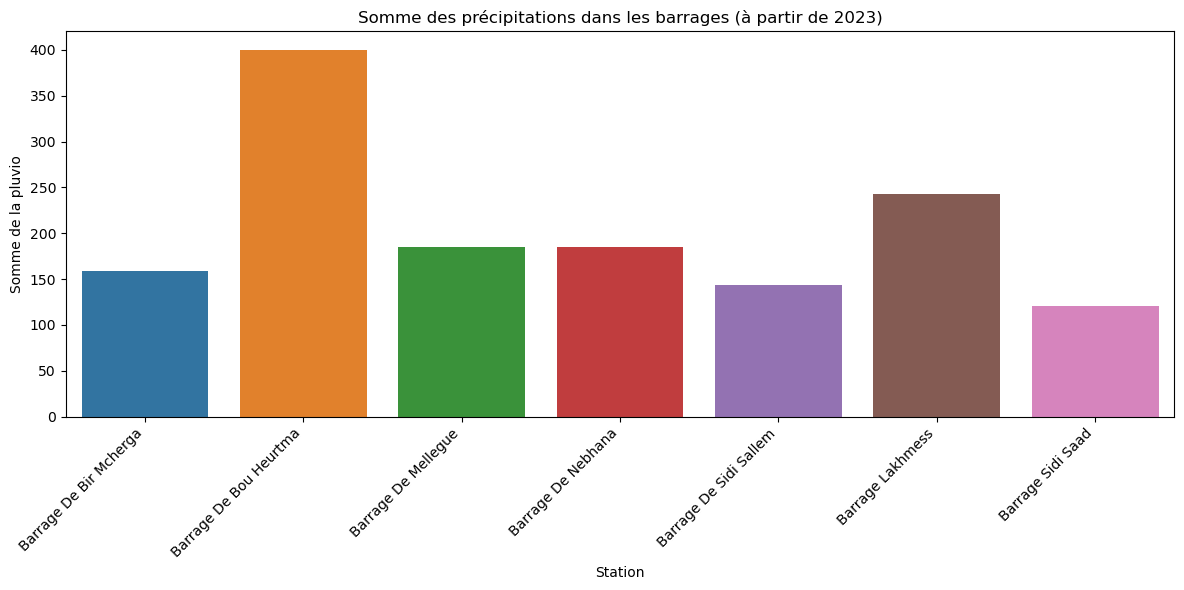

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convertir la colonne 'Date' en format de date
df['Date'] = pd.to_datetime(df['Date'])

# Filtrer les données à partir de 2023
df_2023 = df[df['Date'].dt.year >= 2023]

# Filtrer les stations qui ont le mot "barrage" dans leur nom
stations_barrage = df_2023[df_2023['station'].str.contains('barrage', case=False)]

# Grouper par station et calculer la somme de la pluvio pour chaque station
somme_pluvio_par_station = stations_barrage.groupby('station')['Pluvio_du_jour'].sum().reset_index()

# Créer un graphique à barres avec rotation des étiquettes sur l'axe des x
plt.figure(figsize=(12, 6))
sns.barplot(x='station', y='Pluvio_du_jour', data=somme_pluvio_par_station)
plt.title('Somme des précipitations dans les barrages (à partir de 2023)')
plt.xlabel('Station')
plt.ylabel('Somme de la pluvio')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter les coupures
plt.show()


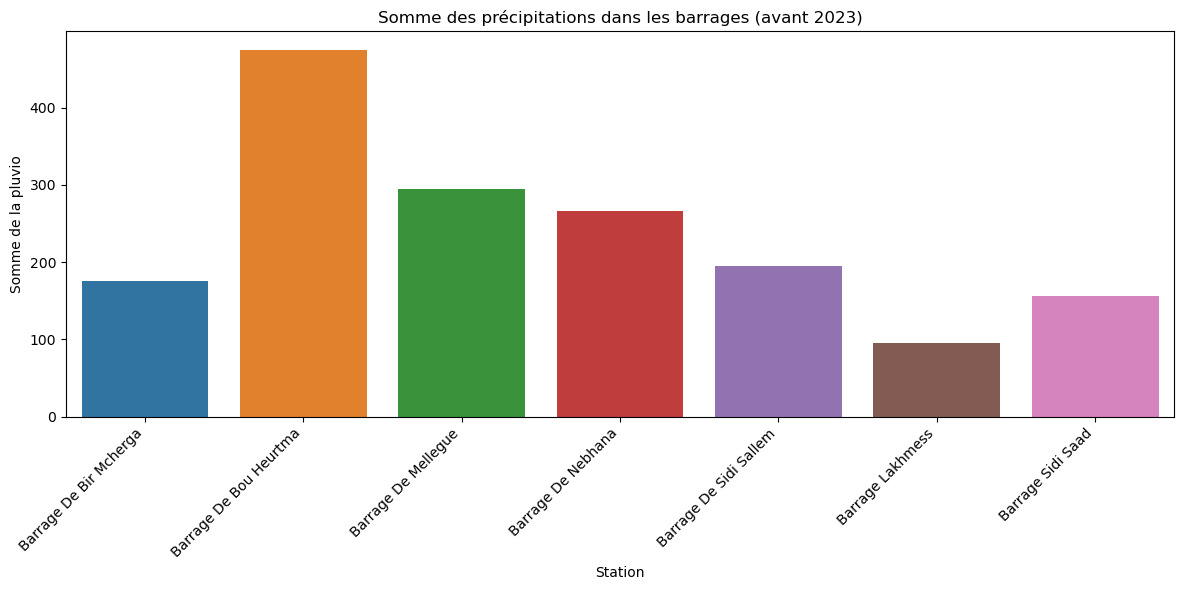

In [8]:
# Filtrer les données à partir de 2023
df_2023 = df[(df['Date'].dt.year >= 2022) & (df['Date'].dt.year < 2023)]

# Filtrer les stations qui ont le mot "barrage" dans leur nom
stations_barrage = df_2023[df_2023['station'].str.contains('barrage', case=False)]

# Grouper par station et calculer la somme de la pluvio pour chaque station
somme_pluvio_par_station = stations_barrage.groupby('station')['Pluvio_du_jour'].sum().reset_index()

# Créer un graphique à barres avec rotation des étiquettes sur l'axe des x
plt.figure(figsize=(12, 6))
sns.barplot(x='station', y='Pluvio_du_jour', data=somme_pluvio_par_station)
plt.title('Somme des précipitations dans les barrages (avant 2023)')
plt.xlabel('Station')
plt.ylabel('Somme de la pluvio')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter les coupures
plt.show()


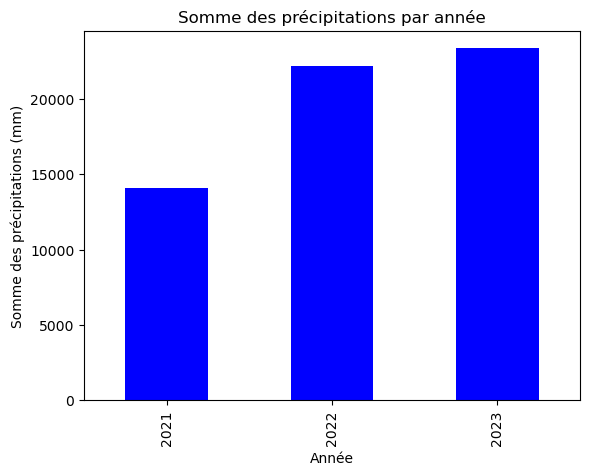

In [9]:
# Extraction de l'année à partir de la colonne 'Date'
df['Annee'] = pd.to_datetime(df['Date']).dt.year

# Regroupement des données par année et calcul de la somme des précipitations
somme_precipitations_par_annee = df.groupby('Annee')['Pluvio_du_jour'].sum()

# Création d'un graphique
somme_precipitations_par_annee.plot(kind='bar', color='blue')
plt.xlabel('Année')
plt.ylabel('Somme des précipitations (mm)')
plt.title('Somme des précipitations par année')
plt.show()

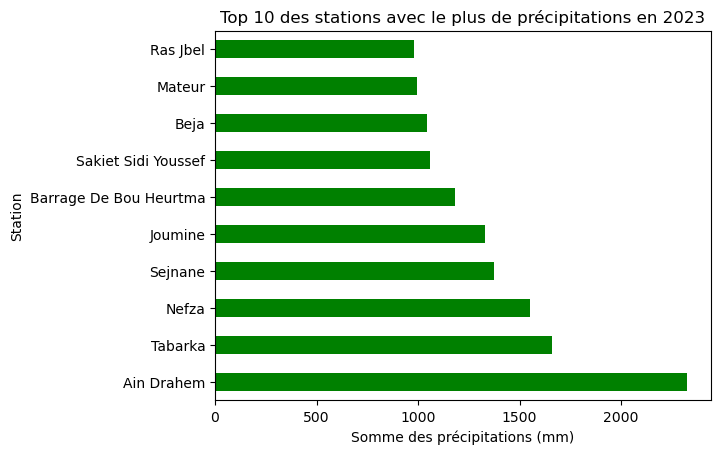

In [10]:
# Filtrage des données pour l'année 2023
df['Annee'] = pd.to_datetime(df['Date']).dt.year

# Groupement des données par station et calcul de la somme des précipitations
somme_precipitations_par_station = df.groupby('station')['Pluvio_du_jour'].sum()

# Sélection des 10 stations ayant le plus de précipitations
top_10_stations = somme_precipitations_par_station.nlargest(10)

# Création d'un graphique
top_10_stations.plot(kind='barh', color='green')  # Utilisation de 'barh' pour un graphique horizontal
plt.xlabel('Somme des précipitations (mm)')
plt.ylabel('Station')  # Inversion des axes
plt.title('Top 10 des stations avec le plus de précipitations en 2023')
plt.show()


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (12).

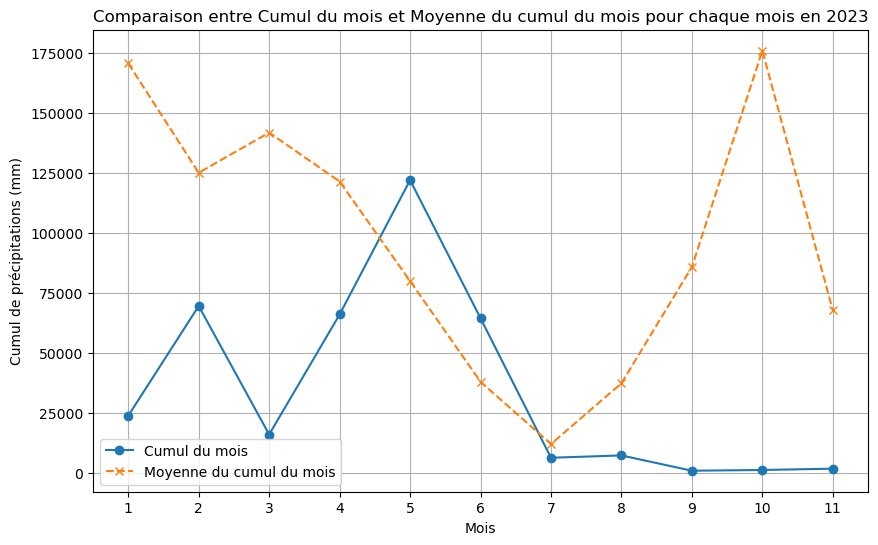

In [11]:
# Convertir la colonne 'Date' en type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ajouter une colonne 'Mois' pour extraire le mois de chaque date
df['Mois'] = df['Date'].dt.month

# Filtrer les données pour l'année 2023
df_2023 = df[df['Date'].dt.year == 2023]

# Créer une DataFrame pivot pour avoir le cumul du mois et la moyenne du cumul du mois pour chaque mois
tableau_pivot = df_2023.pivot_table(index='Mois', values=['Cumul_du_mois', 'Cumul_moy_du_mois'], aggfunc='sum')

# Création d'un graphique
plt.figure(figsize=(10, 6))

# Tracé du cumul du mois
plt.plot(tableau_pivot.index, tableau_pivot['Cumul_du_mois'], label='Cumul du mois', marker='o')

# Tracé de la moyenne du cumul du mois
plt.plot(tableau_pivot.index, tableau_pivot['Cumul_moy_du_mois'], label='Moyenne du cumul du mois', linestyle='--', marker='x')

# Ajout de légendes, titre et libellés d'axe
plt.legend()
plt.xlabel('Mois')
plt.ylabel('Cumul de précipitations (mm)')
plt.title('Comparaison entre Cumul du mois et Moyenne du cumul du mois pour chaque mois en 2023')
plt.grid(True)
plt.xticks(tableau_pivot.index, ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])

# Affichage du graphique
plt.tight_layout()
plt.show()

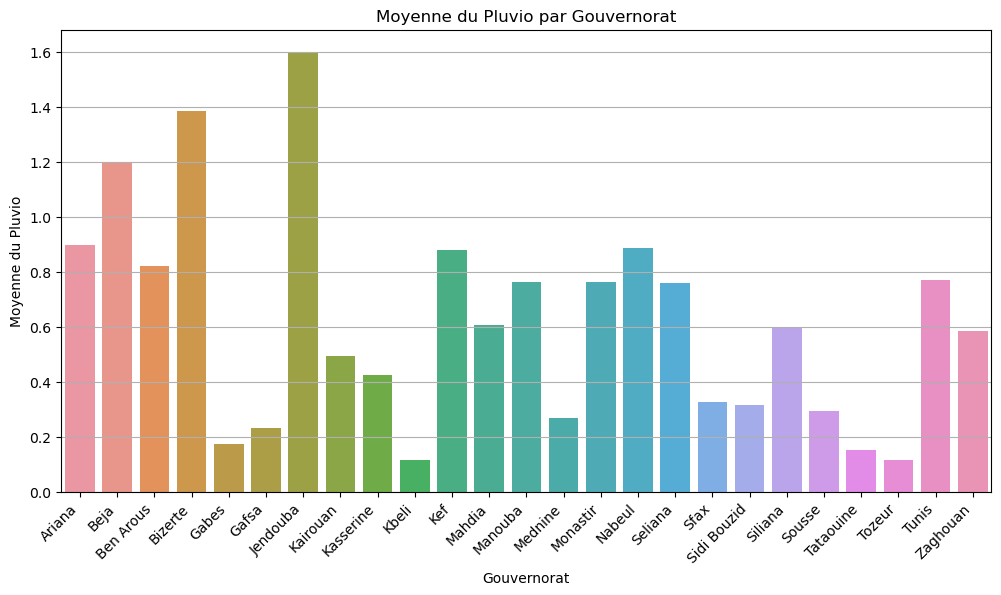

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la moyenne du pluvio par gouvernorat
average_precipitation_by_gouvernorat = df.groupby('Gouvernerat')['Pluvio_du_jour'].mean().reset_index()

# Utiliser un graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Gouvernerat', y='Pluvio_du_jour', data=average_precipitation_by_gouvernorat)

plt.title('Moyenne du Pluvio par Gouvernorat')
plt.xlabel('Gouvernorat')
plt.ylabel('Moyenne du Pluvio')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.grid(axis='y')
plt.show()


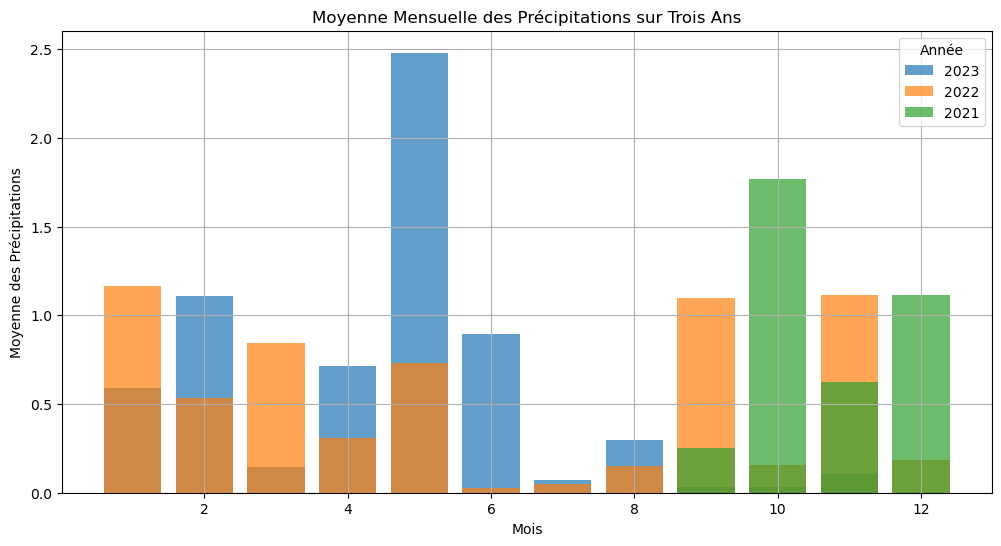

In [31]:
import matplotlib.pyplot as plt

# Calculer la moyenne mensuelle des précipitations sur trois ans
average_precipitation_by_month = df.groupby(['Année', 'Mois'])['Pluvio_du_jour'].mean().reset_index()

# Utiliser un graphique en barres groupées
plt.figure(figsize=(12, 6))
for année in df['Année'].unique():
    data = average_precipitation_by_month[average_precipitation_by_month['Année'] == année]
    plt.bar(data['Mois'], data['Pluvio_du_jour'], label=str(année), alpha=0.7)

plt.title('Moyenne Mensuelle des Précipitations sur Trois Ans')
plt.xlabel('Mois')
plt.ylabel('Moyenne des Précipitations')
plt.legend(title='Année')
plt.grid(True)
plt.show()


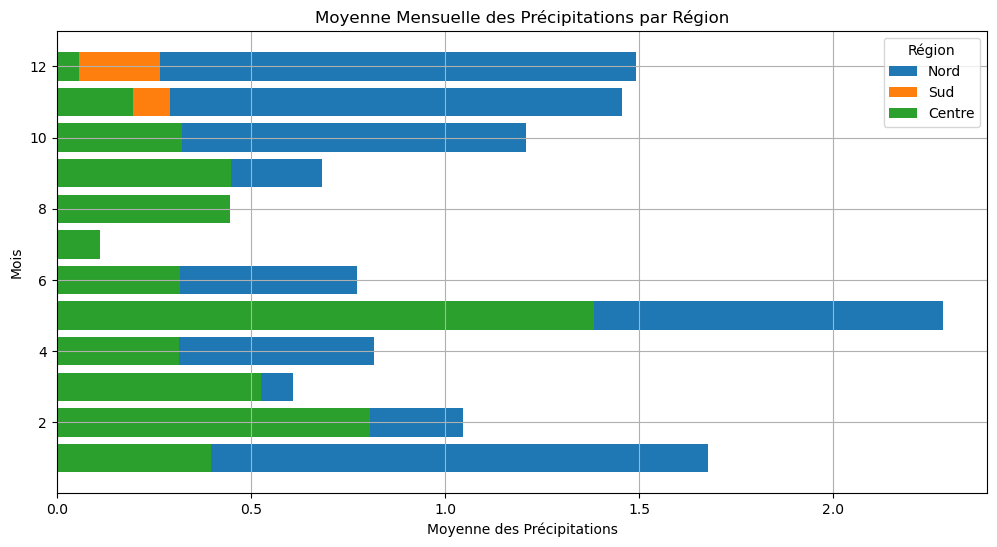

In [24]:
import matplotlib.pyplot as plt

# Calculer la moyenne mensuelle des précipitations pour chaque région
average_precipitation_by_region = df.groupby(['region', 'Mois'])['Pluvio_du_jour'].mean().reset_index()

# Créer un diagramme en barres horizontal pour chaque région
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors[:len(df['region'].unique())]
for i, region in enumerate(df['region'].unique()):
    region_data = average_precipitation_by_region[average_precipitation_by_region['region'] == region]
    plt.barh(region_data['Mois'], region_data['Pluvio_du_jour'], label=region, color=colors[i])

plt.title('Moyenne Mensuelle des Précipitations par Région')
plt.xlabel('Moyenne des Précipitations')
plt.ylabel('Mois')
plt.legend(title='Région')
plt.grid(True)
plt.show()
